<a href="https://colab.research.google.com/github/ckckck1373/LearnPytorch/blob/master/nump_torch(%E8%8E%AB%E7%85%A90).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import numpy as np

np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()

print(
     '\nnumpy: ', np_data,
     '\ntorch: ', torch_data,
     '\ntensor2array: ', tensor2array,
 )


numpy:  [[0 1 2]
 [3 4 5]] 
torch:  tensor([[0, 1, 2],
        [3, 4, 5]]) 
tensor2array:  [[0 1 2]
 [3 4 5]]


In [19]:
#abs
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data) #32bit

print(
    '\nabs',
    '\nnumpy: ', np.abs(data),       #[1 2 1 2]
    '\ntorch: ', torch.abs(tensor),  #[1 2 1 2]
    '\nnumpy.sin: ', np.sin(data),
    '\ntorch.sin: ' , torch.sin(tensor),
    '\nnumpy.mean: ', np.mean(data),
    '\ntorch.mean: ', torch.mean(tensor),
)


abs 
numpy:  [1 2 1 2] 
torch:  tensor([1., 2., 1., 2.]) 
numpy.sin:  [-0.84147098 -0.90929743  0.84147098  0.90929743] 
torch.sin:  tensor([-0.8415, -0.9093,  0.8415,  0.9093]) 
numpy.mean:  0.0 
torch.mean:  tensor(0.)


In [20]:
data1 = [[1, 2], [3, 4]]
tensor1 = torch.FloatTensor(data1) #32-bit floating point
data = np.array(data) #tramsform to np data
print(
      '\nnumpy: ', np.matmul(data1, data1), #=data.dot(data1)
      '\ntorch: ', torch.mm(tensor1, tensor1)) #tensor.dot(tensor1, tensor1)is scalar


numpy:  [[ 7 10]
 [15 22]] 
torch:  tensor([[ 7., 10.],
        [15., 22.]])


In [36]:
#2-2 variable 變換成variable之後才可以反向傳遞
import torch
from torch.autograd import Variable

tensor2 = torch.FloatTensor([[1, 2],[3, 4]])
variable = Variable(tensor2, requires_grad= True)#想像tensor是雞蛋;variable是籃子，計算的時候會透過variable計算時記錄路線

print(tensor2)
print(variable)#包含variable containing

t_out = torch.mean(tensor2*tensor2) #x^2
v_out = torch.mean(variable*variable)

print(t_out)
print(v_out)

v_out.backward()#誤差的反向傳遞

# v_out = 1/4*sum(variable* variable)
# d(v_out)/d(variable) = 1/4* 2* variable = variable/ 2
print('\nvariable_grad: ',variable.grad)



print('\nvariable_data: ',variable.data) #查看variable裡面有哪些data
print('\nvariable_numpy: ',variable.data.numpy())#轉換成numpy array from variable，

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)

variable_grad:  tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])

variable_data:  tensor([[1., 2.],
        [3., 4.]])

variable_numpy:  [[1. 2.]
 [3. 4.]]



###Q: 為什要激勵函數? <br>
Ans: 為了達成非線性的目的 <br>

y = AF(Wx) <br>
AF就是非線性函數，用來掰彎線型函數<br>

####Ex: relu, sigmoid, tanh等非線性函數(要可以微分，因為要反向傳遞)
* 通常在CNN用 *relu* ; 在RNN用 *relu or tanh*
* *relu* 可以讓小於零的部分全部變成零
* *sigmoid* 讓大數變小

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


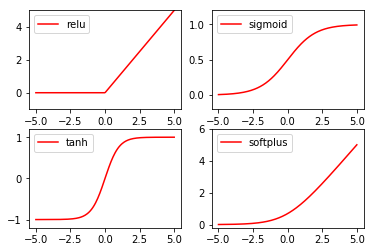

In [41]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

#fake data
x = torch.linspace(-5, 5, 200)  #x data (tensor), shape = (100,1)
                                #-5到5之間取200個點
x = Variable(x)
x_np = x.data.numpy()#要畫圖的時候還是要轉換成numpy的形式(from torch)

y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
# y_softmax = F.softmax(x) 是用來做概率的圖(不是上述線性類型)


plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best') #legend 是圖例

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')